# ALEXNET


1. Write a program to implement the AlexNet model (Note : You can use any publically
available dataset for testing). While implementing you have to show following things:
- Display sample input and output images (at least 10 images).
-Display the total images in the database, size of the image, no of classes in the
database.
- Display the first convolution function kernel filter coefficient values
- Display the training accuracy / training error
-Display the testing accuracy

In [1]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.layers.normalization import BatchNormalization


In [2]:
fpath = "E:/AI & ML NEHA/Images"
random_seed = 42

categories = os.listdir(fpath)
categories = categories[:20]
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound'] 

No. of categories =  20


In [3]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            img_array = Image.fromarray(img, 'RGB')
            
            #resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227
            resized_img = img_array.resize((227, 227))
            
            img_lst.append(np.array(resized_img))
            
            labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  3633 
No. of labels loaded =  3633
<class 'list'> <class 'list'>


In [4]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (3633, 227, 227, 3) 
Labels shape =  (3633,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


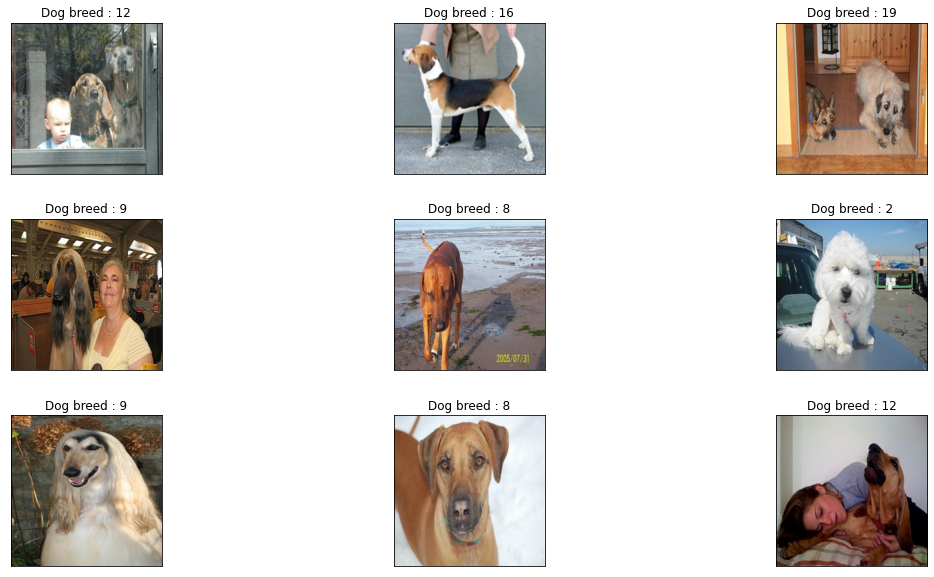

In [5]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Dog breed : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

In [6]:
#1-step in data shuffling

#get equally spaced numbers in a given range
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

#shuffle all the equally spaced values in list 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [   0    1    2 ... 3630 3631 3632]

'n' values after shuffling =  [2178  183  184 ...  860 3507 3174]


In [7]:
#2-step in data shuffling

#shuffle images and corresponding labels data in both the lists
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (3633, 227, 227, 3) 
Labels shape after shuffling =  (3633,)


In [8]:
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (3633, 227, 227, 3)


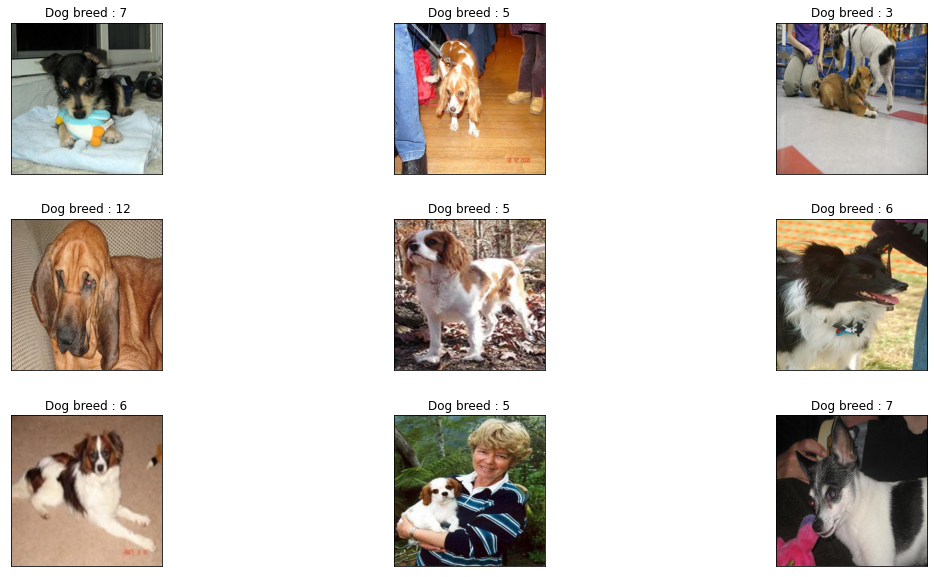

In [9]:
display_rand_images(images, labels)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

x_train shape =  (2906, 227, 227, 3)
y_train shape =  (2906,)

x_test shape =  (727, 227, 227, 3)
y_test shape =  (727,)


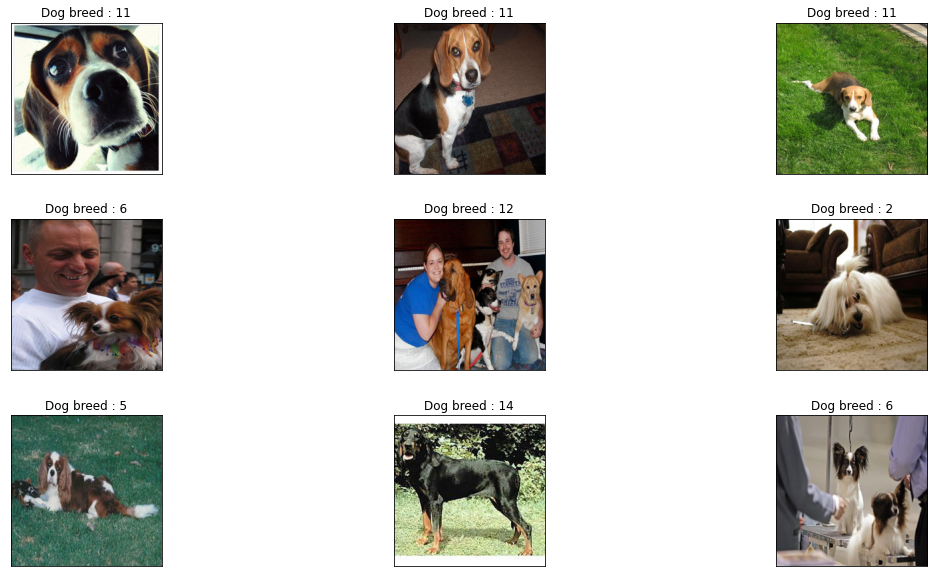

In [11]:
display_rand_images(x_train, y_train)

In [12]:
model=Sequential()

#1 conv layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#3 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Flatten())

#1 dense layer
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#2 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#3 dense layer
model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#output layer
model.add(Dense(20,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 256)       1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 384)         8

In [13]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [14]:
%%time
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
91/91 [==============================] - 188s 2s/step - loss: 3.7332 - accuracy: 0.0826
Epoch 2/100
91/91 [==============================] - 156s 2s/step - loss: 3.1667 - accuracy: 0.1390
Epoch 3/100
91/91 [==============================] - 159s 2s/step - loss: 2.9856 - accuracy: 0.1522
Epoch 4/100
91/91 [==============================] - 156s 2s/step - loss: 2.9075 - accuracy: 0.1588
Epoch 5/100
91/91 [==============================] - 160s 2s/step - loss: 2.8235 - accuracy: 0.1752
Epoch 6/100
91/91 [==============================] - 160s 2s/step - loss: 2.6933 - accuracy: 0.1958
Epoch 7/100
91/91 [==============================] - 118s 1s/step - loss: 2.6417 - accuracy: 0.1939
Epoch 8/100
91/91 [==============================] - 112s 1s/step - loss: 2.6473 - accuracy: 0.2099
Epoch 9/100
91/91 [==============================] - 102s 1s/step - loss: 2.4673 - accuracy: 0.2445
Epoch 10/100
91/91 [==============================] - 100s 1s/step - loss: 2.4745 - accuracy: 0.2616

91/91 [==============================] - 97s 1s/step - loss: 0.0538 - accuracy: 0.9819
Epoch 83/100
91/91 [==============================] - 96s 1s/step - loss: 0.0623 - accuracy: 0.9775
Epoch 84/100
91/91 [==============================] - 96s 1s/step - loss: 0.0605 - accuracy: 0.9810
Epoch 85/100
91/91 [==============================] - 96s 1s/step - loss: 0.0394 - accuracy: 0.9889
Epoch 86/100
91/91 [==============================] - 96s 1s/step - loss: 0.0751 - accuracy: 0.9732
Epoch 87/100
91/91 [==============================] - 97s 1s/step - loss: 0.1315 - accuracy: 0.9614
Epoch 88/100
91/91 [==============================] - 96s 1s/step - loss: 0.1639 - accuracy: 0.9518
Epoch 89/100
91/91 [==============================] - 97s 1s/step - loss: 0.1327 - accuracy: 0.9574
Epoch 90/100
91/91 [==============================] - 96s 1s/step - loss: 0.0863 - accuracy: 0.9730
Epoch 91/100
91/91 [==============================] - 98s 1s/step - loss: 0.1468 - accuracy: 0.9529
Epoch 92/100


In [15]:
loss, accuracy = model.evaluate(x_test, y_test)

print(loss,accuracy)

23/23 [==============================] - 6s 255ms/step - loss: 5.3495 - accuracy: 0.3109
5.349492073059082 0.3108665645122528


In [16]:
pred = model.predict(x_test)

pred.shape

(727, 20)

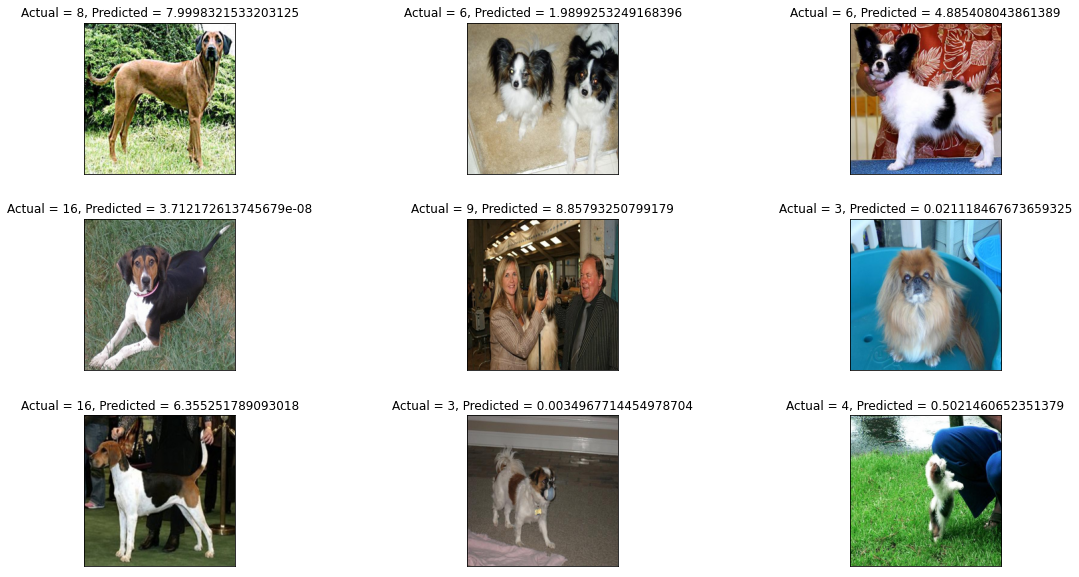

In [17]:
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(9):
    n += 1 
    r = np.random.randint( 0, x_test.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(x_test[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(y_test[r[0]] , y_test[r[0]]*pred[r[0]][y_test[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()

https://github.com/nehrjv/Deep-Learning-lab-Assignment/tree/main/LENET%20AND%20ALEXNET

Dataset link-https://drive.google.com/file/d/1a3lGY5NzR_-p74G_6osge4we1Bt_g5ml/view?usp=sharing